# Analyzing Bay Wheels's trip data 
## by Kyungjin Cho

## Preliminary Wrangling

> This document explores the Bay Wheels's trip data for public use containing over 230,000 bike rides. This data was modified on the 6th of November, 2019. 

## Part I. Gathering & Assessing Data

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [2]:
# Load in the dataset into a pandas dataframe
df = pd.read_csv('201910-baywheels-tripdata.csv')

In [3]:
# Check first five (5) records
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,62337,2019-10-31 16:25:01.5970,2019-11-01 09:43:59.0290,148,Horton St at 40th St,37.829705,-122.287610,385,Woolsey St at Sacramento St,37.850578,-122.278175,12222,Customer,NaN,NaN,No
1,72610,2019-10-31 13:04:11.1950,2019-11-01 09:14:21.8050,376,Illinois St at 20th St,37.760458,-122.387540,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,282,Customer,NaN,NaN,No
2,56636,2019-10-31 17:17:37.6480,2019-11-01 09:01:33.7720,453,Brannan St at 4th St,37.777934,-122.396973,453,Brannan St at 4th St,37.777934,-122.396973,10940,Customer,NaN,NaN,No
3,42250,2019-10-31 20:11:11.1270,2019-11-01 07:55:21.7440,182,19th Street BART Station,37.809369,-122.267951,163,Lake Merritt BART Station,37.797320,-122.265320,12623,Subscriber,1997.0,Male,No
4,40076,2019-10-31 18:48:32.1410,2019-11-01 05:56:28.4670,237,Fruitvale BART Station,37.775232,-122.224498,237,Fruitvale BART Station,37.775232,-122.224498,2601,Customer,NaN,NaN,No


In [4]:
# Check random ten (10) records
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
177684,479,2019-10-08 18:54:05.5230,2019-10-08 19:02:04.8150,99,Folsom St at 15th St,37.767037,-122.415443,127,Valencia St at 21st St,37.756708,-122.421025,661,Subscriber,1980.0,Female,No
84190,612,2019-10-21 13:33:19.3390,2019-10-21 13:43:31.7280,129,Harrison St at 20th St,37.758862,-122.412544,76,McCoppin St at Valencia St,37.771662,-122.422423,11378,Subscriber,1958.0,Male,No
28767,2432,2019-10-28 16:10:56.2840,2019-10-28 16:51:29.1750,52,McAllister St at Baker St,37.777416,-122.441838,6,The Embarcadero at Sansome St,37.804770,-122.403234,3226,Customer,NaN,NaN,No
217067,1239,2019-10-03 15:02:33.1030,2019-10-03 15:23:12.5290,104,4th St at 16th St,37.767045,-122.390833,133,Valencia St at 22nd St,37.755213,-122.420975,10787,Subscriber,1980.0,Male,No
98291,766,2019-10-18 18:43:58.2180,2019-10-18 18:56:45.0160,80,Townsend St at 5th St,37.775235,-122.397437,16,Steuart St at Market St,37.794130,-122.394430,665,Customer,1974.0,Male,No
20165,739,2019-10-29 16:53:29.8320,2019-10-29 17:05:49.8220,52,McAllister St at Baker St,37.777416,-122.441838,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,361,Customer,NaN,NaN,No
23498,1224,2019-10-29 08:40:10.2280,2019-10-29 09:00:34.8170,424,Greenwich St at Webster St,37.799208,-122.434122,24,Spear St at Folsom St,37.789677,-122.390428,12996,Subscriber,NaN,NaN,No
37078,1249,2019-10-27 06:05:29.0920,2019-10-27 06:26:18.5810,365,Turk St at Fillmore St,37.780450,-122.431946,371,Lombard St at Columbus Ave,37.802746,-122.413579,10331,Subscriber,1979.0,Female,Yes
25293,448,2019-10-29 06:19:35.4160,2019-10-29 06:27:03.4790,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,182,19th Street BART Station,37.809369,-122.267951,9704,Subscriber,1970.0,Male,No
167007,270,2019-10-10 07:35:11.1960,2019-10-10 07:39:41.6350,462,Cruise Terminal at Pier 27,37.804223,-122.401643,12,Pier 1/2 at The Embarcadero,37.796389,-122.394586,9945,Subscriber,1984.0,Male,No


In [5]:
# Check shape of dataframe
print(df.shape)

(239895, 16)


In [6]:
# Check data types of dataframe
print(df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [7]:
# Check information of the dataframe
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239895 entries, 0 to 239894
Data columns (total 16 columns):
duration_sec               239895 non-null int64
start_time                 239895 non-null object
end_time                   239895 non-null object
start_station_id           239895 non-null int64
start_station_name         239895 non-null object
start_station_latitude     239895 non-null float64
start_station_longitude    239895 non-null float64
end_station_id             239895 non-null int64
end_station_name           239895 non-null object
end_station_latitude       239895 non-null float64
end_station_longitude      239895 non-null float64
bike_id                    239895 non-null int64
user_type                  239895 non-null object
member_birth_year          189678 non-null float64
member_gender              189679 non-null object
bike_share_for_all_trip    239895 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 29.3+ MB


In [8]:
# Check duplication
df.duplicated().sum()

0

In [9]:
# Check descriptive statistics of the dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,239895.000000,239895.000000,239895.000000,239895.000000,239895.000000,239895.000000,239895.000000,239895.000000,189678.000000
mean,826.415528,158.184718,37.767016,-122.355633,150.661485,37.765500,-122.348888,8528.550382,1985.114979
std,2002.271276,133.071335,0.102741,0.120441,131.819174,0.275541,0.837078,4341.890037,10.138610
min,61.000000,3.000000,37.309014,-122.495241,3.000000,0.000000,-122.495241,12.000000,1889.000000
25%,379.000000,49.000000,37.769218,-122.415204,36.000000,37.769757,-122.411647,3316.000000,1980.000000
50%,596.000000,112.000000,37.780450,-122.398438,104.000000,37.780526,-122.398279,10272.000000,1988.000000
75%,913.000000,254.000000,37.795392,-122.387540,245.000000,37.795392,-122.387540,11874.000000,1992.000000
max,85545.000000,482.000000,37.880222,-121.864021,482.000000,37.880222,0.000000,13112.000000,2001.000000


## Part II. Cleaning Data

> __Quality issues__
- Calculate the users' age for convenience.
- Remove age outliers.
- Set appropriate data types.

In [10]:
# Create copies
df_clean = df.copy()

__Set appropriate data types__

In [11]:
# To timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [12]:
# To category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')

In [13]:
# To str
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)
df_clean.bike_id = df_clean.bike_id.astype(str)

In [14]:
# Test
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239895 entries, 0 to 239894
Data columns (total 16 columns):
duration_sec               239895 non-null int64
start_time                 239895 non-null datetime64[ns]
end_time                   239895 non-null datetime64[ns]
start_station_id           239895 non-null object
start_station_name         239895 non-null object
start_station_latitude     239895 non-null float64
start_station_longitude    239895 non-null float64
end_station_id             239895 non-null object
end_station_name           239895 non-null object
end_station_latitude       239895 non-null float64
end_station_longitude      239895 non-null float64
bike_id                    239895 non-null object
user_type                  239895 non-null category
member_birth_year          189678 non-null float64
member_gender              189679 non-null category
bike_share_for_all_trip    239895 non-null category
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), o

__Calculate the users' age for convenience__

In [15]:
# Calculate the age by using the birth year
df_clean['member_age'] = 2019-df_clean['member_birth_year']

In [16]:
# Test
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
51377,363,2019-10-24 21:36:55.596,2019-10-24 21:42:59.543,10083,Chestnut St at Van Ness Ave,37.802288,-122.424509,10083,Jackson St at Polk St,37.794160,-122.421568,10083,Subscriber,1981.0,Male,No,38.0
23947,319,2019-10-29 08:35:01.674,2019-10-29 08:40:21.535,11873,Berry St at King St,37.771762,-122.398438,11873,4th St at 16th St,37.767045,-122.390833,11873,Subscriber,1984.0,Male,No,35.0
102239,913,2019-10-18 10:41:31.358,2019-10-18 10:56:45.312,12068,3rd St at Townsend St,37.778742,-122.392741,12068,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,12068,Subscriber,1992.0,Male,No,27.0
66101,522,2019-10-23 11:40:17.933,2019-10-23 11:49:00.930,12117,Mission Bay Kids Park,37.772301,-122.393028,12117,Spear St at Folsom St,37.789677,-122.390428,12117,Customer,NaN,NaN,No,NaN
99590,785,2019-10-18 17:16:06.356,2019-10-18 17:29:12.309,9827,Berry St at 4th St,37.775880,-122.393170,9827,Clay St at Battery St,37.795001,-122.399970,9827,Subscriber,1991.0,Female,No,28.0


__Remove age outliers__

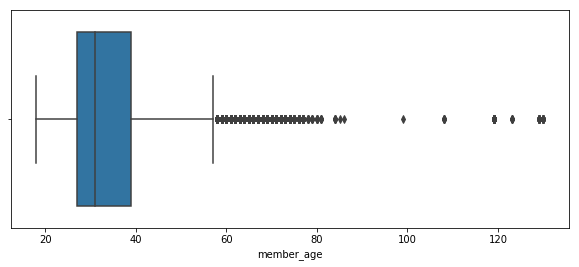

In [17]:
# Create the age boxplot
plt.figure(figsize = [10, 4])
base_color = sns.color_palette()[0]

sns.boxplot(data=df_clean, x='member_age', color=base_color);

In [18]:
# Check the descriptive information related to the age
df_clean.member_age.describe()

count    189678.000000
mean         33.885021
std          10.138610
min          18.000000
25%          27.000000
50%          31.000000
75%          39.000000
max         130.000000
Name: member_age, dtype: float64

In [19]:
# Make the age of members below 60 because most members are below 60
df_clean = df_clean.query('member_age <=60')

In [20]:
# Set appropriate data types
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)
df_clean.member_age = df_clean.member_age.astype(int)

In [21]:
# Test
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age
count,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000
mean,704.556231,37.764512,-122.350893,37.763470,-122.345694,1985.724890,33.275110
std,1458.254174,0.108509,0.125890,0.240191,0.705684,9.086783,9.086783
min,61.000000,37.309014,-122.472823,0.000000,-122.472823,1959.000000,18.000000
25%,356.000000,37.769201,-122.413278,37.769305,-122.410662,1981.000000,26.000000
50%,557.000000,37.778999,-122.398279,37.780526,-122.397086,1988.000000,31.000000
75%,839.000000,37.795392,-122.294837,37.795392,-122.294837,1993.000000,38.000000
max,85545.000000,37.880222,-121.864021,37.880222,0.000000,2001.000000,60.000000


In [22]:
# Test
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186180 entries, 3 to 239894
Data columns (total 17 columns):
duration_sec               186180 non-null int64
start_time                 186180 non-null datetime64[ns]
end_time                   186180 non-null datetime64[ns]
start_station_id           186180 non-null object
start_station_name         186180 non-null object
start_station_latitude     186180 non-null float64
start_station_longitude    186180 non-null float64
end_station_id             186180 non-null object
end_station_name           186180 non-null object
end_station_latitude       186180 non-null float64
end_station_longitude      186180 non-null float64
bike_id                    186180 non-null object
user_type                  186180 non-null category
member_birth_year          186180 non-null int32
member_gender              186180 non-null category
bike_share_for_all_trip    186180 non-null category
member_age                 186180 non-null int32
dtypes: category

__Save the cleaned data__

In [23]:
# Save file
df_clean.to_csv('clean_data.csv', index=False)

### What is the structure of your dataset?

> There are about 239,895 bike rides in the dataset with 17 features 
- duration: duration_sec, start_time, end_time 
- stations(start/end): id, name, latitude, longitude  
- user: bike_id, user_type, birty_year, gender, age 
- bike share: bike_share_for_all_trip

### What is/are the main feature(s) of interest in your dataset?

> FIrst of all, I want to figure out which age range uses this service the most and the least. Also, I want to know when members use bikes the most in detail.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that diverse datetime and age will help support my investigation into my features of interest

## Part III. Univariate Exploration

> I will start by looking at the duration and datetime of the trips

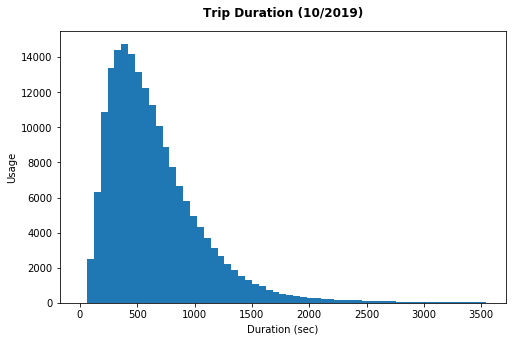

In [24]:
# Duration sec distribution per user type
bin_edges = np.arange(0, 3600,60)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges)

plt.title("Trip Duration (10/2019)", y=1.03, fontsize=12, fontweight='bold')
plt.xlabel('Duration (sec)')
plt.ylabel('Usage');

When we look at this histogram named 'Trip Duration', we can found out that that trip durations are no longer than 1800 seconds.

Therefore, we can guess reasons for it by using this result. Firstly, members of this service can use it for short trip such as commuting. Also, there can be additional charge for long trips 

In [25]:
# Extract start time weekdays
# extract start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [26]:
# Extract start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

In [27]:
# Save file
df_clean.to_csv('clean_final.csv', index=False)

<Figure size 576x360 with 0 Axes>

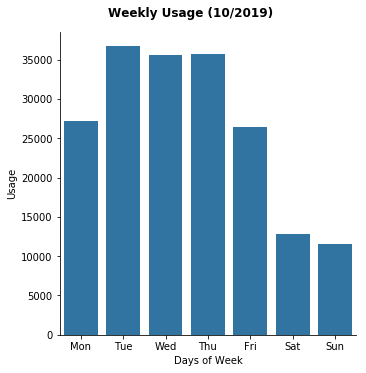

In [28]:
# Weekly usage of this system

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=[8, 5])
week_plot = sns.catplot(data=df_clean, x='start_time_weekday', kind='count', color = base_color, order = weekday)
week_plot.set_axis_labels("Days of Week", "Usage")
week_plot.fig.suptitle('Weekly Usage (10/2019)', y=1.03, fontsize=12, fontweight='bold');

People mainly used this bike share system during weekdays comparing to weekend. Among weekdays, specific days, such as 'Tuesday', 'Wednesday' and 'Thursday', are the most popular days. Therefore, we can guess that this system is probably used for commuting.  

<Figure size 576x360 with 0 Axes>

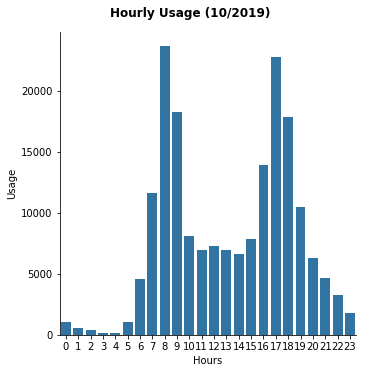

In [29]:
# Hourly usage of this system
plt.figure(figsize=[8, 5])
hour_plot = sns.catplot(data=df_clean, x='start_time_hour', kind='count', color = base_color)
hour_plot.set_axis_labels("Hours", "Usage")
hour_plot.fig.suptitle('Hourly Usage (10/2019)', y=1.03, fontsize=12, fontweight='bold');

This system is mainly used around '8am - 9am' and '5pm - 6pm' according to this result. Therefore, we can guess that this system is probably used for commuting.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> When I observed the duration time(seconds), there were some cases which has longer duration time than one day(24 hours). Therefore, I set the range of the histogram between 0 second to 3600 seconds. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When I created a new column named 'member_age', the age of most members were below 60. Therefore, I made the age of members below 60.

## Part IV. Bivariate Exploration

> In this section, I will exploring the 'user type' dataset mainly

In [30]:
# Split the user type - customer
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()

In [31]:
# Split the user type - subscriber
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

In [32]:
# Calculating the number of customers & subsribers
customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

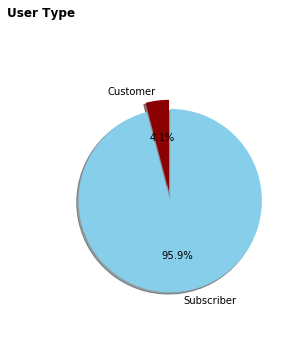

In [33]:
# Create a pie chart
plt.figure(figsize = [8, 5])
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkred', 'skyblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User Type', y=1.03, fontsize=12, fontweight='bold');

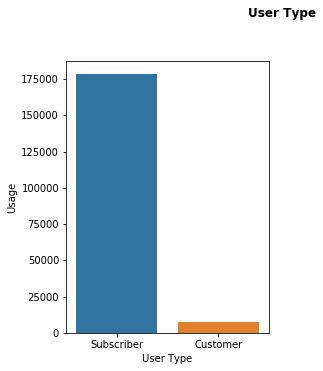

In [34]:
# Create a bar chart
plt.figure(figsize = [8, 5])
plt.subplot(1, 2, 1)

user = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
user.set_xlabel('User Type')
user.set_ylabel('Usage')
plt.suptitle('User Type', y=1.03, fontsize=12, fontweight='bold');

This bike sharing service is mainly used by __subscribers__. About 95.9% of users are __subscribers__.

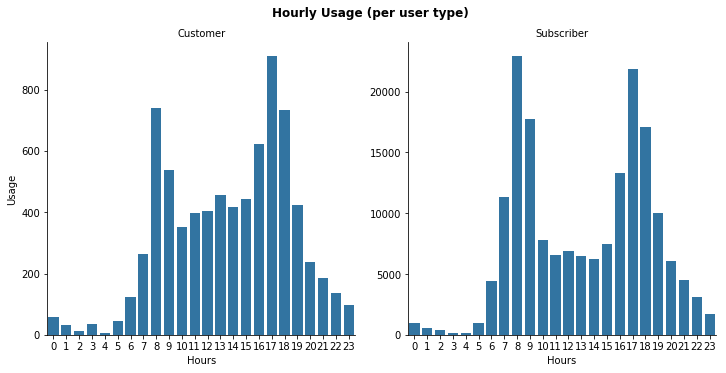

In [35]:
# Hourly usege of the bike sharing system per user type
g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Hours", "Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly Usage (per user type)', y=1.03, fontsize=12, fontweight='bold');

__Customers__ use this bike sharing service mainly between 8 am - 7 pm, and the renting peak time is around 5 pm. On the other hand, __Subscribers__ use this system at around 7-9am and 4-7pm when they go to their work and come back to their houses.


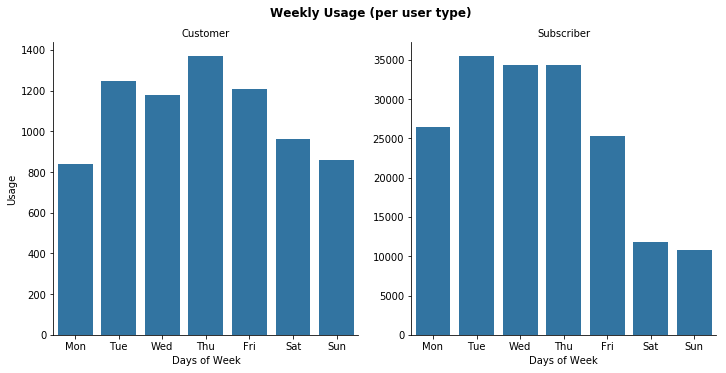

In [36]:
# Weekly usege of the bike sharing system per user type
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = base_color, order = weekday)
g.set_axis_labels("Days of Week", "Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly Usage (per user type)', y=1.03, fontsize=12, fontweight='bold');

We can guess that __customers__ are probably occasional riders and tourist because of this result. They use this bike sharing system for weekend trips as well. On the other hand, __subscribers__ are probably daily commuters.They use this sharing sevice on weekdays mainly.

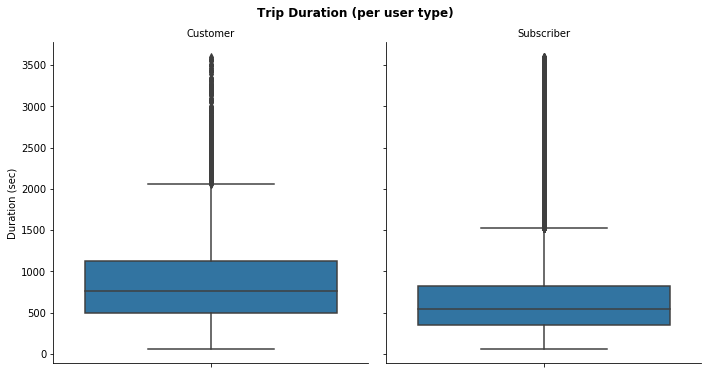

In [37]:
# Distribution time of the bike sharing system per user type
data = df_clean.query('duration_sec < 3600')
g = sns.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (sec)")
g.fig.suptitle('Trip Duration (per user type)', y=1.03, fontsize=12, fontweight='bold');

When we look at this box plots named 'Trip Duration (per user type)', we can see that trip durations are longer for __customers__ than __subscribers__. Therefore, we can guess that __subscribers__ are probably commuters who take short trips to work or school.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I added the user type to this analysis because I wanted to get information about different usage behaviours between __customers__ and __subscribers__. 
When I looked at those charts, I could guess that __customers__ are probably casual riders such as tourists. They used this bike shareing service mainly during weekends than weekdays. Also, they used this system mainly between 8 am - 7 pm, and the renting peak time is around 5 pm. 
In addition, I could expect that __subscribers__ are daily commuters according to these charts. They used this service more often during weekdays than weekends. They used this system at around 7-9am and 4-7pm when they go to their work and come back to their houses as well.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Trip durations are longer for __customers__ than __subscribers__. We can guess that it's because of the fact that __customers__ prefer longer trips and weekend bike riding. On the other hand, we can expact that __subscribers__ probably use this system mainly for commuting.

## Part V. Multivariate Exploration

> In this section, I will exploring the 'gender' dataset mainly

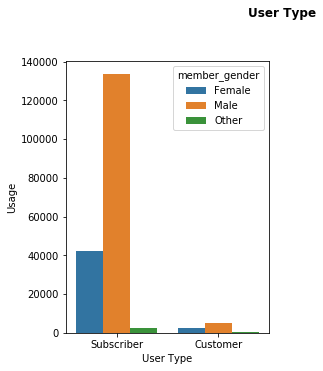

In [38]:
# Create a bar chart
plt.figure(figsize = [8, 5])

plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Usage');

plt.suptitle('User Type', y=1.03, fontsize=12, fontweight='bold');

When we look at this bar chart, we can know that __men__ are using this system more often than __women__ and others (the registration system allows you to choose 'Other' as a gender). However, the ratio is much smaller between __men__ and __women__ for customers than for subscribers. Each ratio is 2:1 and 3:1

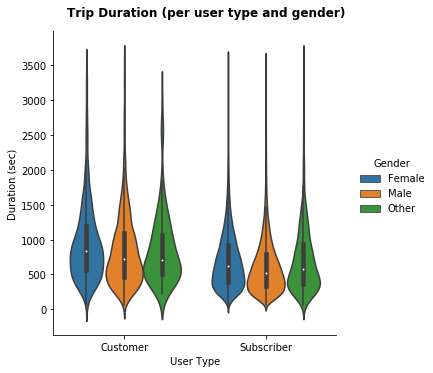

In [39]:
# Create a chart about duration (sec) distribution per user type and gender

g = sns.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="violin")

g.set_axis_labels("User Type", "Duration (sec)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip Duration (per user type and gender)', y=1.03, fontsize=12, fontweight='bold');

When we look at this chart, we can realize that __women__ take longer trips than __men__ and others. Especially, we can observe the differences more easily for customer than subscriber

<Figure size 432x288 with 0 Axes>

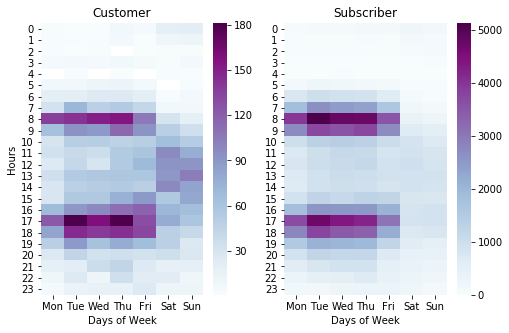

In [40]:
# Create a chart
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)

plt.suptitle('Hourly Usage (per user type, weekdays and hours)', fontsize=12, fontweight='bold')
plt.figure(figsize = [8, 5])
#For customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Days of Week')
plt.ylabel('Hours')

# For subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Days of Week')
plt.ylabel('');

When we observe this plot, we can get information about hourly usage and weekly usage of each user type. Accroding to this result, we can check that __customers__ use this bike sharing service more often on weekend. On the other hand, __subscribers__ use this system on weekdays mainly.However, both types of users use this systmem mainly at 8 am and 5 pm on weekdays. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I wanted to figure out characteristics of users' behaviors. Plotting usage of this service throughout the day and within the days of week gave me some information. For example, customers use this bike sharing service more often on weekend while subscribers use this system on weekdays mainly. However, specific time when botu users this service mainy were similar with each other.


### Were there any interesting or surprising interactions between features?

> I tried to check about the information related to trend difference for genders for each user group. Actually, There were not much of the differences in trends. However, I could know that women take longer trips than men and others.